In [12]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


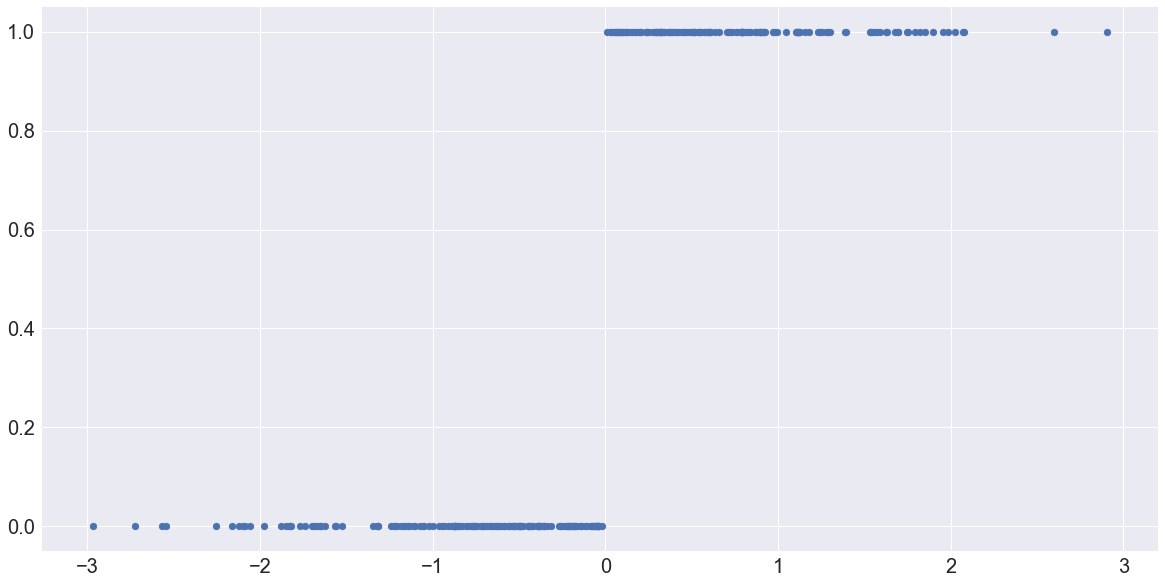

In [15]:
n_sample = 100
x_train = np.random.normal(0, 1, size=(n_sample, 1)).astype(np.float32)
y_train = (x_train >= 0).astype(np.float32)

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=20)

In [33]:
class Classifier(tf.keras.Model):
    def __init__(self):
        super(classifier, self).__init__()
        self.d1 = tf.keras.layers.Dense(units=1, activation='sigmoid', input_shape=(1, ))
    
    def call(self, x):
        x = self.d1(x)
        return x

EPOCHS=10
LR=0.01

model = Classifier()
loss_object = tf.keras.losses.BinaryCrossentropy()
optimizer= tf.keras.optimizers.SGD(learning_rate=LR)

loss_metric = tf.keras.metrics.Mean() # Loss값을 다 저장하고 평균값을 구할 수 있음
acc_metric = tf.keras.metrics.CategoricalAccuracy() # 정확도를 알려줌

for epoch in range(EPOCHS):
    for x, y in zip(x_train, y_train):
        x = tf.reshape(x, (1, 1)) # tf.Tensor로 변환 & 1*1배열 형식으로 변환
        y = tf.reshape(y, (1, 1))
        with tf.GradientTape() as tape:
            predictions = model(x)
            loss = loss_object(y, predictions)
        gradients = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(gradients, model.trainable_variables))
        
        loss_metric(loss)
        acc_metric(y, predictions) # 원핫 인코딩 + % 결과값 출력
    print(epoch, loss) # 여기서 나온 loss 값은 마지막 데이터에 대한 loss값 즉, 전체 loss값이 아님
    
    ds_loss = loss_metric.result()
    ds_acc = acc_metric.result()
    
    print(ds_loss)
    print(ds_acc*100)
    
    loss_metric.reset_states()
    acc_metric.reset_states()

0 tf.Tensor(0.48309436, shape=(), dtype=float32)
tf.Tensor(0.5007221, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
1 tf.Tensor(0.3947422, shape=(), dtype=float32)
tf.Tensor(0.43538514, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
2 tf.Tensor(0.3378428, shape=(), dtype=float32)
tf.Tensor(0.39366144, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
3 tf.Tensor(0.29703897, shape=(), dtype=float32)
tf.Tensor(0.3638236, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
4 tf.Tensor(0.26584572, shape=(), dtype=float32)
tf.Tensor(0.34099677, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
5 tf.Tensor(0.24097224, shape=(), dtype=float32)
tf.Tensor(0.32273504, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
6 tf.Tensor(0.22053596, shape=(), dtype=float32)
tf.Tensor(0.30765426, shape=(), dtype=float32)
tf.Tensor(100.0, shape=(), dtype=float32)
7 tf.Tensor(0.20336702, shape=(), dtyp

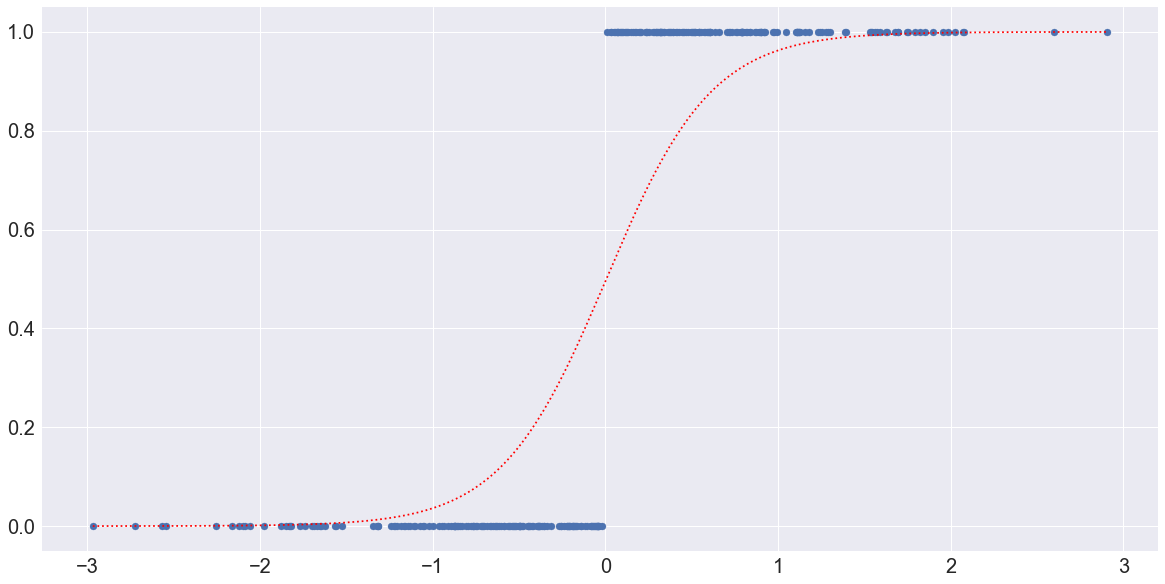

In [35]:
x_min, x_max = x_train.min(), x_train.max()

x_test = np.linspace(x_min, x_max, 300).astype(np.float32).reshape(-1, 1)

x_test_tf = tf.constant(x_test)
y_test_tf = model(x_test_tf)

x_result = x_test_tf.numpy()
y_result = y_test_tf.numpy()

fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(x_train, y_train)
ax.tick_params(labelsize=20)
ax.plot(x_result, y_result, 'r:')